In [2]:
from scipy import *
import numpy as np
from scipy.special import *
from time import time
from matplotlib.pyplot import *
import gaussxw as gs
import math as math

#1a 
#We are now calculating the erf using the gaussian quadrature as while as 
#the Trapezoidal rule and Sipsons rule

# =============================================================================
# First we Will imprt functions that we will be useing
# calculate integrals using the 3 methods
# Plot the results
# =============================================================================


#define function to be integrated for erf
def f(x):
    """takes an x value and returns the 
    associated output of the function that
    gets integrated in the erf function"""
    return (2/sqrt(pi))*np.exp(-(x**2))

#define a function that integrates and function using trabezoidal rule
def trap(g,x1,x2,n):
    """takes a function g a start value of
    x1, as stop value of x2, and a number of 
    slices n and integrates useing the 
    trapezoidal method"""
    H=(x2-x1)/n#steps for integral
    v=0.5*(g(x1)+g(x2))#end of the trapezoidal rule steps aren counted as heavily so add seperate
    for j in range (1,n):#add all of the double counted internal trapezoids
        v+=(g(x1+j*H))
    return (v)*H

#define a function that integrates any function using simpsons rule
def simp(g,x1,x2,n):
# =============================================================================
#      """takes a function g a start value of
#     x1, as stop value of x2, and a number of 
#     slices n and integrates useing simpson's
#     rule"""
# =============================================================================
    h=(x2-x1)/n
    v=g(x1)+g(x2)#endpoint weighted differently add first
    for k in range(1,n):#i even
        if k%2==0:
            v+=2*g(x1+k*h)
        else:#i odd
            v+=4*g(x1+k*h)
    I=(1/3)*h*(v)#sum and multiply by 
    return I

def gaussint(g,x1,x2,n):#define function for gaussian quadrature
    """takes a function G a start value of 
    x1, an end value of x2 and integrates
    using the gaussian quadrature"""
    x,w=gs.gaussxw(n)#method taken from textbook
    xp=0.5*(x2-x1)*x+0.5*(x2+x1)
    wp=0.5*(x2-x1)*w
    s=0.0
    for l in range(n):
        s+=wp[l]*g(xp[l])#sum integral
    return s

N=range(8,1000,2)#define array of umbers from 8 to 1000
a=0#start
b=3#stop
#calculate the integral
Itrap=np.empty(len(N))
Isimp=np.empty(len(N))
Igaus=np.empty(len(N))
for i in range (0,len(N)):
    Itrap[i]=trap(f,a,b,N[i])
    Isimp[i]=simp(f,a,b,N[i])
    Igaus[i]=gaussint(f,a,b,N[i])

print("Itrapezoidal method")
print(Itrap)
print("Simpsons Rule")
print(Isimp)
print("Gaussian Quadrature")
print(Igaus)


Itrapezoidal method
[0.99996876 0.99997191 0.99997369 0.99997478 0.9999755  0.999976
 0.99997636 0.99997663 0.99997683 0.99997699 0.99997711 0.99997722
 0.9999773  0.99997737 0.99997743 0.99997748 0.99997752 0.99997756
 0.99997759 0.99997761 0.99997764 0.99997766 0.99997768 0.99997769
 0.99997771 0.99997772 0.99997774 0.99997775 0.99997776 0.99997777
 0.99997777 0.99997778 0.99997779 0.9999778  0.9999778  0.99997781
 0.99997781 0.99997782 0.99997782 0.99997782 0.99997783 0.99997783
 0.99997784 0.99997784 0.99997784 0.99997784 0.99997785 0.99997785
 0.99997785 0.99997785 0.99997786 0.99997786 0.99997786 0.99997786
 0.99997786 0.99997786 0.99997787 0.99997787 0.99997787 0.99997787
 0.99997787 0.99997787 0.99997787 0.99997787 0.99997788 0.99997788
 0.99997788 0.99997788 0.99997788 0.99997788 0.99997788 0.99997788
 0.99997788 0.99997788 0.99997788 0.99997788 0.99997789 0.99997789
 0.99997789 0.99997789 0.99997789 0.99997789 0.99997789 0.99997789
 0.99997789 0.99997789 0.99997789 0.99997789

In [3]:
#1b
#In this probelm we are calculating realtive errors and the Calculated error of the gaussian quadrature
#and plotting a log-log of the errors.

# =============================================================================
# use erf function from scipy to calculate 'true' version
# take the value for the integrals subtract off the value of 3 for the erf
# function thats built into scipy
# use equation (2) to calculate the error
# plot differences on a logarythmic scale
# =============================================================================

Trueval=erf(3)
#Calculate the relative errors
Itraperr=np.abs(Itrap-Trueval)
Isimperr=np.abs(Isimp-Trueval)
Igauserr=np.abs(Igaus-Trueval)
#define error of Gaussian quadrature from eqn 2
def eq2err(g,x1,x2,n):
    """calculates the error of the gaussian quadrature by subtracting the integral calculated with
    twice as many divisions form the first calculation of the integral as defined in equation 2"""
    err = np.abs(gaussint(g,x1,x2,2*n) - gaussint(g,x1,x2,n))
    return err
Igauser2=np.empty(len(N))
for i in range (0,len(N)):
    Igauser2[i]=eq2err(f,a,b,N[i])#calculates the error in the gaussain quadrature.




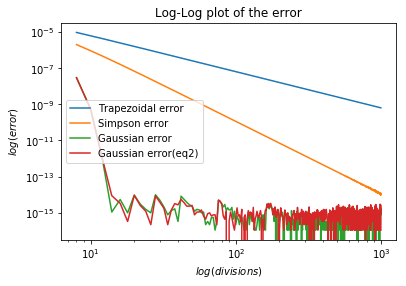

In [4]:
#log-log plots of the error and devisions.
loglog(N,Itraperr,label="Trapezoidal error")
loglog(N,Isimperr,label="Simpson error")
loglog(N,Igauserr,label="Gaussian error")
loglog(N,Igauser2,label="Gaussian error(eq2)")
xlabel('$log(divisions)$')
ylabel('$log(error)$')
title('Log-Log plot of the error')
legend()
show()


The errors make sense. The Gaussian quadrature bring you very close to the true value of the integral much faster than the trapezoidal method and simpson rule integration. The error on the integral using the gaussian quadrature error estimate calculated by the equation, $\epsilon_N =I_{2N} -I_N$ is a good estimate of the error when the integral is far away from the true error as the lines are slose together until the error gets within the range of expected acuracy for the computer. After a certain poin the calculated integral is so close the error would be best represented by the precision that the computer is representing the number by.

Text(0.5,1,'Probability of snow blowing')

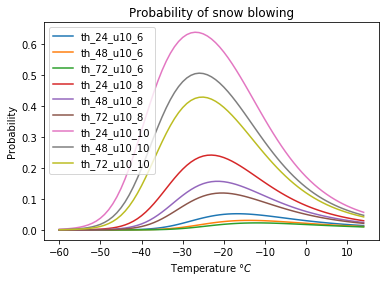

In [8]:
#1c
#In this part we are calculating the the probability of snow to blow off the ground a s a function of windspeed
#time on the ground, and temperature to determine of snow is likely to blow off the ground. 
N=100
u10=([6,8,10])
th=([24,48,72])
thh=5
TA=5

def ubar(TAA):
    return 11.2+0.365*TAA+0.00706*TAA**2+0.9*math.log(thh)
def delt(TAA):
    return 4.3+0.145*TAA+0.00196*TAA**2
def F(u):
    front=1/(2*(2**0.5)*delt(TA))
    insd=((ubar(TA)-u))/(sqrt(2)*(delt(TA)))
    return front*f(insd)#define in terms of erf which is done in part utilizing f which is what integrated to find erf
def P(U10):
    RET=gaussint(F,0,U10,N)
    return RET
ta=range(-60,15,1)
for j in range(0,len(u10)):
    for k in range (0,len(th)):
        PP=empty(len(ta))
        thh=th[k]
        for l in range(0,len(ta)):
            TA=ta[l]
            PP[l]=P(u10[j])
        plot(ta,PP,label="th_%d_u10_%d"%(th[k],u10[j]))    
legend()
xlabel('Temperature $\degree C$')
ylabel('Probability')
title('Probability of snow blowing')        


The faster the winf is blowing, and the less time the snow has spent on the gorund the more likely it is to blow. This relationship makes sense as fater wind is more likely to pick up snow and blow it arround. The longer snow has been on the ground the less likely it is to blow up off the ground when the wind picks up, which makes sense as after snow has been on the ground for a while it tends to bind together and isnt as powdery. the faster the wind is blowing the lower the optimal temperature for snow blowing is.